https://thesamovar.wordpress.com/2009/03/22/fast-fractals-with-python-and-numpy/

https://www.youtube.com/watch?v=q2fIWB8o-bs

In [2]:
from numpy import *
 
def mandel(n, m, itermax, xmin, xmax, ymin, ymax):
    '''
    Fast mandelbrot computation using numpy.
 
    (n, m) are the output image dimensions
    itermax is the maximum number of iterations to do
    xmin, xmax, ymin, ymax specify the region of the
    set to compute.
    '''
    # The point of ix and iy is that they are 2D arrays
    # giving the x-coord and y-coord at each point in
    # the array. The reason for doing this will become
    # clear below...
    ix, iy = mgrid[0:n, 0:m]
    # Now x and y are the x-values and y-values at each
    # point in the array, linspace(start, end, n)
    # is an array of n linearly spaced points between
    # start and end, and we then index this array using
    # numpy fancy indexing. If A is an array and I is
    # an array of indices, then A[I] has the same shape
    # as I and at each place i in I has the value A[i].
    x = linspace(xmin, xmax, n)[ix]
    y = linspace(ymin, ymax, m)[iy]
    # c is the complex number with the given x, y coords
    c = x+complex(0,1)*y
    del x, y # save a bit of memory, we only need z
    # the output image coloured according to the number
    # of iterations it takes to get to the boundary
    # abs(z)>2
    img = zeros(c.shape, dtype=int)
    # Here is where the improvement over the standard
    # algorithm for drawing fractals in numpy comes in.
    # We flatten all the arrays ix, iy and c. This
    # flattening doesn't use any more memory because
    # we are just changing the shape of the array, the
    # data in memory stays the same. It also affects
    # each array in the same way, so that index i in
    # array c has x, y coords ix[i], iy[i]. The way the
    # algorithm works is that whenever abs(z)>2 we
    # remove the corresponding index from each of the
    # arrays ix, iy and c. Since we do the same thing
    # to each array, the correspondence between c and
    # the x, y coords stored in ix and iy is kept.
    ix.shape = n*m
    iy.shape = n*m
    c.shape = n*m
    # we iterate z->z^2+c with z starting at 0, but the
    # first iteration makes z=c so we just start there.
    # We need to copy c because otherwise the operation
    # z->z^2 will send c->c^2.
    z = copy(c)
    for i in xrange(itermax):
        if not len(z): break # all points have escaped
        # equivalent to z = z*z+c but quicker and uses
        # less memory
        multiply(z, z, z)
        add(z, c, z)
        # these are the points that have escaped
        rem = abs(z)>2.0
        # colour them with the iteration number, we
        # add one so that points which haven't
        # escaped have 0 as their iteration number,
        # this is why we keep the arrays ix and iy
        # because we need to know which point in img
        # to colour
        img[ix[rem], iy[rem]] = i+1
        # -rem is the array of points which haven't
        # escaped, in numpy -A for a boolean array A
        # is the NOT operation.
        rem = -rem
        # So we select out the points in
        # z, ix, iy and c which are still to be
        # iterated on in the next step
        z = z[rem]
        ix, iy = ix[rem], iy[rem]
        c = c[rem]
    return img

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:72: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


Time taken: 0.0495851039886


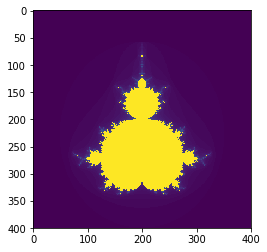

In [4]:
import time
import matplotlib.pyplot as plt

start = time.time()
I = mandel(400, 400, 30, -2.5, 1, -1.75, 1.75)
print 'Time taken:', time.time()-start
I[I==0] = 101

plt.imshow(I)
plt.show()